# covid

In [23]:
import pandas as pd
from datetime import timedelta, datetime
from matplotlib.dates import DateFormatter
import matplotlib.pyplot as plt

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-jvafbrl_ because the default path (/home/matmozaur/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [24]:
COLUMNS_COVID_USABLE = ['total_cases', 'new_cases', 'total_deaths', 'iso_code',
                        'new_deaths', 'total_cases_per_million', 'new_cases_per_million', 'total_deaths_per_million',
                        'new_deaths_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million',
                        'new_tests', 'total_tests', 'total_tests_per_thousand', 'new_tests_per_thousand',
                        'positive_rate',
                        'tests_per_case', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated',
                        'new_vaccinations', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
                        'people_fully_vaccinated_per_hundred']
COLUMNS_COVID = COLUMNS_COVID_USABLE + ['location']
TIMES_COVID = ['week', 'month', '3 months', '6 months', 'all']
COUNTRIES = []
COVID_DATA = None


def download_whole_covid_data():
    data = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv', index_col='date', parse_dates=True)
    data = data[COLUMNS_COVID]
    global COUNTRIES
    COUNTRIES = list(set(data['location']))
#     data.to_csv('data/covid_full.csv')
    global COVID_DATA
    COVID_DATA = data


def download_whole_data():
    download_whole_covid_data()

In [25]:
download_whole_data()

In [26]:
COVID_DATA.head()

,total_cases,new_cases,total_deaths,iso_code,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,weekly_hosp_admissions,...,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,location
date,,,,,,,,,,,,,,,,,,,,,
2020-02-24,1.0,1.0,NaN,AFG,NaN,0.026,0.026,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Afghanistan
2020-02-25,1.0,0.0,NaN,AFG,NaN,0.026,0.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Afghanistan
2020-02-26,1.0,0.0,NaN,AFG,NaN,0.026,0.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Afghanistan
2020-02-27,1.0,0.0,NaN,AFG,NaN,0.026,0.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Afghanistan
2020-02-28,1.0,0.0,NaN,AFG,NaN,0.026,0.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Afghanistan


In [37]:
measure = 'total_cases'
GROUPS = ['World', 'Europe', 'Asia', 'North America', 'European Union',
          'South America', 'Africa']

[]

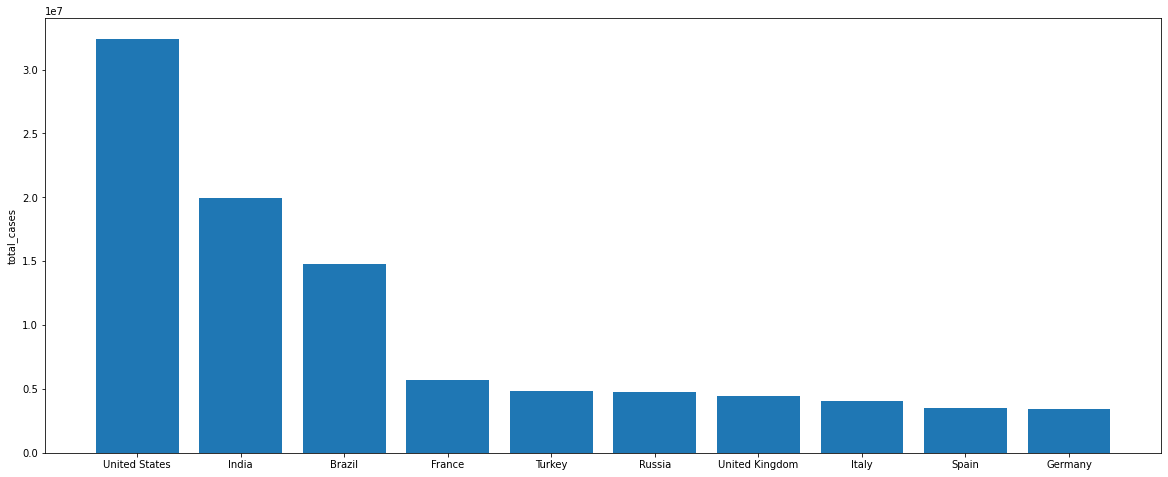

In [69]:
    data = COVID_DATA
    time = datetime.now().replace(hour=0, minute=0, second=0, microsecond=0)
    time = time - timedelta(hours=24)
    data = data[data.index == time]
    data = data[~data.location.isin(GROUPS)]
    ranking = data.sort_values(measure, ascending=False)[['location', measure]]
    ranking.set_index('location', inplace=True)
    fig, ax = plt.subplots(figsize=(20, 8))
    ax.bar(ranking[:10].index, ranking[:10][measure].values)
    ax.set_ylabel(measure)
    plt.plot()

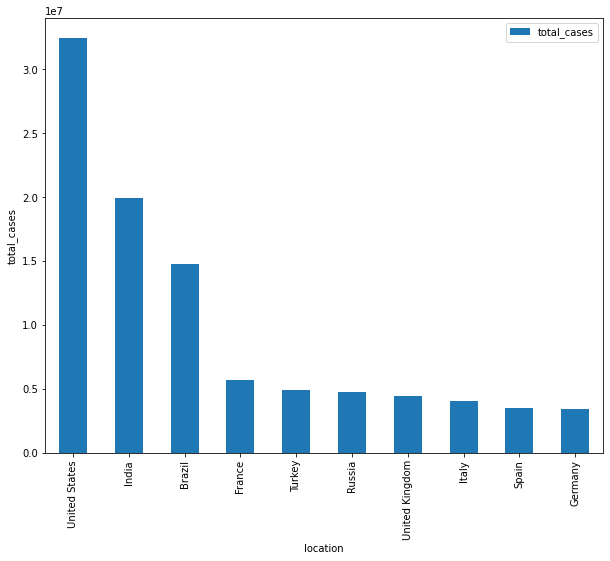

In [53]:
data = COVID_DATA
time = datetime.now().replace(hour=0, minute=0, second=0, microsecond=0)
time = time - timedelta(hours=24)
data = data[data.index == time]
data = data[~data.location.isin(GROUPS)]
ranking = data.sort_values(measure, ascending=False)[['location', measure]]


ranking.set_index('location', inplace=True)

ranking[:10].plot(kind="bar", stacked=True, figsize=(10,8))

plt.ylabel(measure)
plt.show()

# Currency data

In [2]:
import requests 

URL = 'https://api.exchangeratesapi.io/history'

def download_data_currency(start_date, end_date, currencies, base='EUR'): 
    params = {'base': base, 'start_at': start_date, 'end_at': end_date, 'symbols': currencies,
#              'access_key': 'YOUR_ACCESS_KEY'
             } 
    r = requests.get(url=URL, params=params) 
    data = r.json() 
    if 'error' in data:
        print(data['error'])
        return
    return data['rates']

In [3]:
base = 'USD'
start_date = '2019-03-15'
end_date = '2021-03-15'
currencies = ['PLN', 'CHF']

data = download_data_currency(start_date, end_date, currencies, base)

{'code': 101, 'type': 'missing_access_key', 'info': 'You have not supplied an API Access Key. [Required format: access_key=YOUR_ACCESS_KEY]'}


In [4]:
data

# Shares data

In [11]:
import yfinance as yf


def read_table_with_tickers():
    df_names = pd.read_excel('data/yahoo_data.xlsx')
    df_names = df_names.dropna()
    return df_names


def is_ticker_possible(df_names, str_name):
    ticker_list = df_names[df_names["Name"].str.contains(str_name)]["Ticker"].tolist()
    if len(ticker_list)>0:
        return True
    else:
        return False

    
def get_ticker(df_names, str_name):
    """Uzyskuje ticker na podstawie nazwy wprowadzonej przez użytkownika"""
    return find_ticker_list(df_names, str_name)[0]

def check_date(value, min_val, max_val):
    """
    :param value: wartość pola
    :param min_val: minimalna dopuszczalna wartość (włącznie)
    :param max_val: maksymalna dopuszczalna wartość (włącznie)
    :return: True - jeśli wartosć jest poprawna / False - jęsli wartość jest niepoprawna
    """
    value = str(value)
    if value.isdecimal():
        value = int(value)
        if value >= min_val and value <= max_val:
            return True
        else:
            return False
    else:
        return False


def return_valid_date(value):
    """
    Używane do odpowiedniego formatowania wartości w dacie
    np. 1 -> '01'
    :param value: wartość
    :return: wartość jako string i długości 2
    """
    value = str(value)
    if len(value) == 1:
        value = '0' + value
        return value
    else:
        return value

def get_stock_data(df_names, long_name, year, month, day):
    if is_ticker_possible(df_names, long_name):
        name = find_ticker_list(df_names, long_name)[0]get_ticker(df_names, long_name)
        if check_date(year, 2000, 2021) and check_date(month, 1, 12) and check_date(day, 1, 31):
            year, month, day = str(year), return_valid_date(month), return_valid_date(day)
            string_data = "{0}-{1}-{2}".format(str(year), str(month), str(day))
            df = yf.download(name,   start=string_data)
            return df

df_names = read_table_with_tickers()
df_apple = get_stock_data(df_names, "Apple", 2020, 1, 1)
df_apple

